<font color='red'>Comment</font>

Get your API here: https://account.mapbox.com/auth/signup/

Add it to `c:/users/garth/.env`

Mapbox API is open source, for 
1. mapping
2. navigation
3. search

Below, we see Plotly works seamlessly with Mapbox. No imports!

In [7]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Token

# Read the Mapbox API key
load_dotenv()  # mac

# path = "C:/users/garth/.env"
home = Path.home() / ".env"  # windows 1/2
load_dotenv(home)  # windows 2/2

map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

<font color='red'>Comment</font>

See that above? `px.set_mapbox_access_token(map_box_api)`. We use this because plotly manages the client-server relationship for us. Set and forget.

They use our API keys to monitor requests.

### Prep Data

In [5]:
# Read in data
pop_count="C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/101421/population_counts.csv"
foreclosures = pd.read_csv(pop_count, index_col='filing_date', parse_dates=True, infer_datetime_format=True)

df = pd.read_csv(pop_count).drop_duplicates()
data_to_plot = df[["Year", "PopulationCount", "Latitude", "Longitude"]]
filtered_data = df[df["StateDesc"] == "California"]


ValueError: 'filing_date' is not in list

<font color='red'>Comment</font>

Open the .csv file.

We take this file, and overlay it's info on top the map.

### Plot data

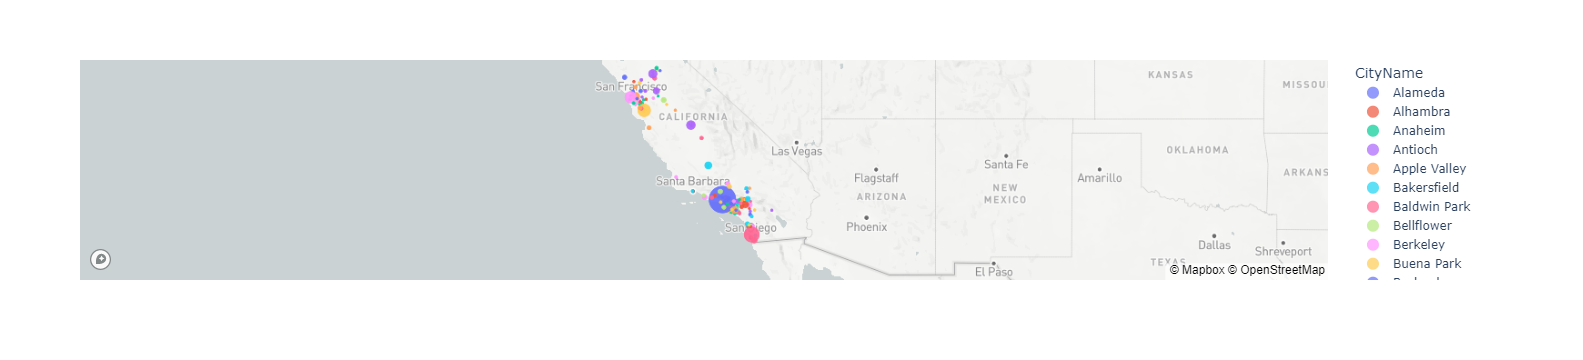

In [18]:
# Plot Data
map_plot = px.scatter_mapbox(
    filtered_data,  # replace with df to watch your computer slow to an absolute crawl!
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    zoom=4
)

# Display the map
map_plot.show()

<font color='red'>Comment</font>

Maps can be very memory intensive. Sometimes they can process for 20 minutes, which makes you think your computer crashed...so be patient with them.

This display is very fast though. See how above we filtered the df down? That is a good idea to ensure your system doesn't crash/load forever.

Apparently, https://datashader.org/ can help us handle large visualizations.